# <b>Kaggle Learn</b>
# 7. Geospatial Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision = 4, suppress = True)
from pandas import Series, DataFrame
%matplotlib inline

## 1. Your First Map

In [2]:
# pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas as gpd

In [4]:
full_data = gpd.read_file("input/DEC_lands.shp")
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4635115.746, 486976.395 4635808..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4637642.459, 491578.701 4638441..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4636099.234, 485032.882 4636191..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4675518.876, 540717.658 4675794..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4909650.001, 583888.721 4909656..."


In [5]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [6]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()
data.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4635115.746, 486976.395 4635808..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4637642.459, 491578.701 4638441..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4636099.234, 485032.882 4636191..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4675518.876, 540717.658 4675794..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4909650.001, 583888.721 4909656..."


In [7]:
data['CLASS'].value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [9]:
wild_lands = data.loc[data['CLASS'].isin(['WILD FOREST', 'WILDERNESS'])]
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4635115.746, 486976.395 4635808..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4637642.459, 491578.701 4638441..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4636099.234, 485032.882 4636191..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4675518.876, 540717.658 4675794..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4909650.001, 583888.721 4909656..."


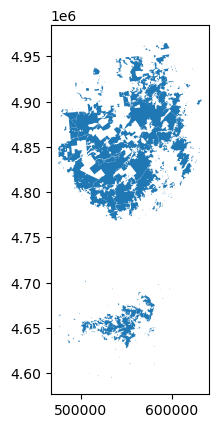

In [10]:
wild_lands.plot();

In [11]:
wild_lands['geometry'].head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4635115.746, 486976.395 4635808...
1    POLYGON ((491931.514 4637416.256, 491305.424 4637642.459, 491578.701 4638441...
2    POLYGON ((486000.287 4635834.453, 485007.550 4636099.234, 485032.882 4636191...
3    POLYGON ((541716.775 4675243.268, 541217.579 4675518.876, 540717.658 4675794...
4    POLYGON ((583896.043 4909643.187, 583891.200 4909650.001, 583888.721 4909656...
Name: geometry, dtype: geometry

In [17]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("input/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("input/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("input/NY_county_boundaries.shp")

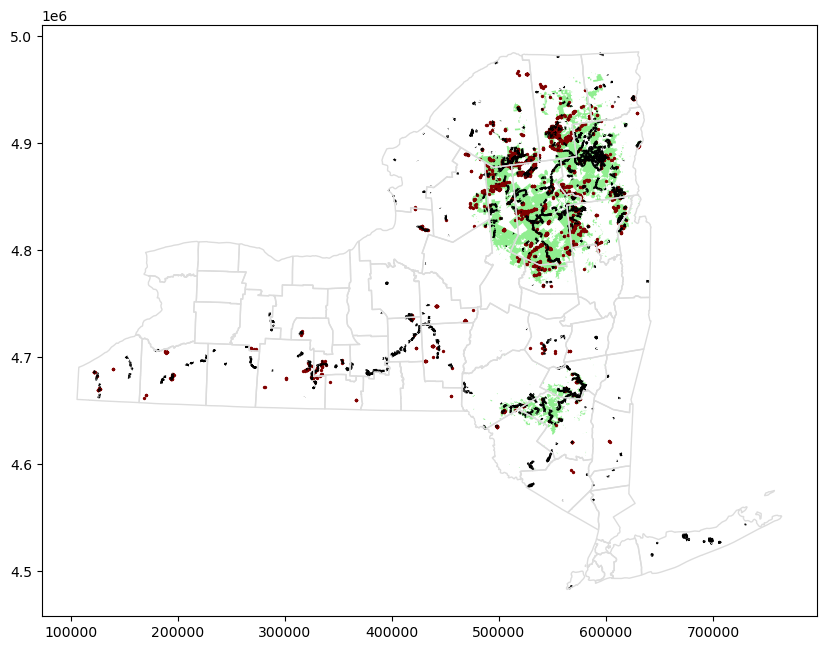

In [18]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax);

## 2. Coordinate Reference Systems

In [19]:
regions = gpd.read_file("input/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

EPSG:32630


In [20]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("input/health_facilities.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


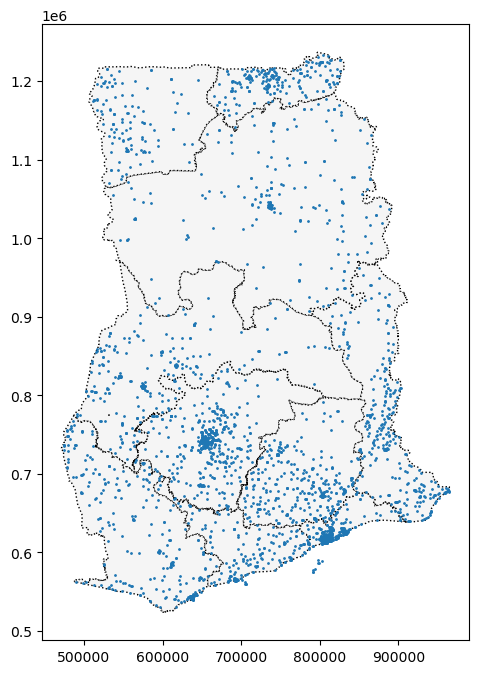

In [22]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax);

The <code>to_crs()</code> method modifies only the <kbd>geometry</kbd> column: all other columns are left as-is.

In [23]:
# The "Latitude" and "Longitude" columns are unchanged
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In [24]:
# Change the CRS to EPSG 4326
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, -1.30972 7.61841, -1.31003 7.6..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, -2.54422 8.76143, -2.54397 8.7..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, -2.06576 6.29431, -2.06553 6.2..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, -0.21737 7.20993, -0.21727 7.2..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0.23519 6.10955, 0.23534 6.10933..."


In [26]:
# Get the x-coordinate of each point
facilities['geometry'].head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [29]:
# Calculate the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions['geometry'].area / 10**6

print("Area of Ghana: {} square kilometers".format(regions['AREA'].sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: EPSG:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 842873.278, 686463.107 842477.20...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 968427.380, 550129.178 968507.19...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 695818.392, 603339.799 695830.93...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 797892.879, 807322.891 797892.92...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 676412.823, 858151.647 676391.29...",3706.511145


## 3. Interactive Maps